# Load Data

In [2]:
import pandas as pd

In [3]:
# !pip install gensim

In [4]:
df_train = pd.read_csv("/data/imdb_reviews_preprocessing18k.csv")

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18498 entries, 0 to 18497
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   review               18498 non-null  object
 1   label                18498 non-null  int64 
 2   rating               18498 non-null  int64 
 3   word_counts          18498 non-null  int64 
 4   preprocessed_review  18496 non-null  object
dtypes: int64(3), object(2)
memory usage: 722.7+ KB


In [7]:
X = df_train['preprocessed_review'].values
y = df_train['label'].values

print(X.shape)
print(y.shape)

(18498,)
(18498,)


In [8]:
print(X)

['although humphrey bogart got star billing king underworld willing bet thank jack warner fact film one hollow crown king underworld supposedly remake paul muni film dr socrates given humphrey bogart cast character written like duke mantee petrified forest even english writer along person james stephenson kay francis john eldredge pair married doctor eldredge pull tricky bit surgery one bogart henchman bogey man appreciates good work done behalf give eldredge 500 00 came play card right eldredge gambling problem see good way get undeclared income killed raid gang hideout francis also thought involved law american medical association matter much protest innocence good aunt jessie busley move small town get away notoriety course notoriety bogart itinerant leslie howard like writer stephenson meet kay plucky resourceful say least bogart character ridiculous wonder poor guy screaming better part gangster shoot people without mercy give henchman hotfoot laugh concerned image therefore kidna

In [9]:
#convert review from string representation of list
try:
  for i in range(0, len(X)):
    if(type(X[i]) == str):
      X[i] = X[i].split(" ")
    else:
      X[i] = list()
except:
  print("Error at", i)

print(X)

[list(['although', 'humphrey', 'bogart', 'got', 'star', 'billing', 'king', 'underworld', 'willing', 'bet', 'thank', 'jack', 'warner', 'fact', 'film', 'one', 'hollow', 'crown', 'king', 'underworld', 'supposedly', 'remake', 'paul', 'muni', 'film', 'dr', 'socrates', 'given', 'humphrey', 'bogart', 'cast', 'character', 'written', 'like', 'duke', 'mantee', 'petrified', 'forest', 'even', 'english', 'writer', 'along', 'person', 'james', 'stephenson', 'kay', 'francis', 'john', 'eldredge', 'pair', 'married', 'doctor', 'eldredge', 'pull', 'tricky', 'bit', 'surgery', 'one', 'bogart', 'henchman', 'bogey', 'man', 'appreciates', 'good', 'work', 'done', 'behalf', 'give', 'eldredge', '500', '00', 'came', 'play', 'card', 'right', 'eldredge', 'gambling', 'problem', 'see', 'good', 'way', 'get', 'undeclared', 'income', 'killed', 'raid', 'gang', 'hideout', 'francis', 'also', 'thought', 'involved', 'law', 'american', 'medical', 'association', 'matter', 'much', 'protest', 'innocence', 'good', 'aunt', 'jessie'

# Tokenizing

In [10]:
tokenizer = keras.preprocessing.text.Tokenizer(filters='', lower=True)

tokenizer.fit_on_texts(X)

tokenizer.get_config()

{'num_words': None,
 'filters': '',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 18498,
 'word_counts': '{"although": 1847, "humphrey": 23, "bogart": 71, "got": 2452, "star": 2747, "billing": 40, "king": 674, "underworld": 64, "willing": 227, "bet": 136, "thank": 233, "jack": 638, "warner": 130, "fact": 2441, "film": 30830, "one": 18111, "hollow": 82, "crown": 37, "supposedly": 212, "remake": 500, "paul": 523, "muni": 24, "dr": 538, "socrates": 3, "given": 1390, "cast": 2779, "character": 11279, "written": 1139, "like": 15127, "duke": 115, "mantee": 1, "petrified": 5, "forest": 167, "even": 8192, "english": 568, "writer": 1414, "along": 1420, "person": 1138, "james": 951, "stephenson": 12, "kay": 48, "francis": 76, "john": 1496, "eldredge": 5, "pair": 213, "married": 415, "doctor": 571, "pull": 385, "tricky": 25, "bit": 3043, "surgery": 55, "henchman": 91, "bogey": 5, "man": 4078, "appreciates": 9, "good": 11665, "work": 3975, "done": 2136

# Texts to Sequences


In [11]:
sequences = tokenizer.texts_to_sequences(X)
max_length = 150

X = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post')
print(X)

[[ 8388     2   682 ...    52   235    90]
 [ 1273    75     6 ...  2712     6     4]
 [   32   135   489 ...   223   269   489]
 ...
 [  278   198    21 ...     0     0     0]
 [  687   629    13 ...     0     0     0]
 [ 1327 20051   775 ...     0     0     0]]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=36)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (16648, 150) (16648,)
Test data: (1850, 150) (1850,)


# Over Sampling

In [13]:
# !pip install imbalanced-learn

In [14]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_over, y_over = ros.fit_resample(X_train, y_train)

# RNN

In [18]:
import spacy
from gensim.models.keyedvectors import KeyedVectors

from keras.layers import Dense
from keras.models import Sequential
from keras.losses import CategoricalCrossentropy
# from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [19]:
!gdown "https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku"

embedding_file = './GoogleNews-vectors-negative300.bin.gz'

Downloading...
From (original): https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku
From (redirected): https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku&confirm=t&uuid=7349d005-404f-47a0-880a-96dc710465fa
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:24<00:00, 67.3MB/s]


In [20]:
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=1000)

In [21]:
# + 1 to account for padding token.
num_tokens = len(tokenizer.word_index) + 1

# Initialize a matrix of zeroes of size: vocabulary x embedding dimension.
embedding_dim = 300
embedding_matrix = np.zeros((num_tokens, embedding_dim))

for word, i in tokenizer.word_index.items():
  if word_vectors.has_index_for(word):
    embedding_matrix[i] = word_vectors[word].copy()


In [22]:
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    input_length=max_length,
    trainable=True
)

In [46]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, SimpleRNN
from tensorflow.keras.regularizers import l2

l2_req = 0.01

rnn = keras.Sequential()

rnn.add(embedding_layer)
rnn.add(SimpleRNN(16, dropout=0.2, recurrent_dropout=0.2, activation='relu', return_sequences = True))
# rnn.add(SimpleRNN(16, dropout=0.1, recurrent_dropout=0.1, activation='relu', return_sequences = True, kernel_regularizer=l2(l2_req)))
rnn.add(SimpleRNN(8,  activation='relu', return_sequences = False))

rnn.add(layers.Flatten())
rnn.add(Dense(3, activation='softmax'))

rnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
rnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 300)          18963300  
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 150, 16)           5072      
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 8)                 200       
                                                                 
 flatten_4 (Flatten)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 3)                 27        
                                                                 
Total params: 18968599 (72.36 MB)
Trainable params: 18968599 (72.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
rnn_y_train = to_categorical(y_over)
rnn_y_test = to_categorical(y_test)

In [48]:
# history = rnn.fit(X_train, rnn_y_train, epochs=10, batch_size=16, validation_data=(X_test, rnn_y_test))

history = rnn.fit(X_over, rnn_y_train, epochs=15, batch_size=32, validation_split = 0.1)

Epoch 1/20
646/646 [==============================] - 189s 290ms/step - loss: 0.9898 - accuracy: 0.4502 - val_loss: 1.1125 - val_accuracy: 0.1332
Epoch 2/20
646/646 [==============================] - 188s 291ms/step - loss: 0.7654 - accuracy: 0.6104 - val_loss: 0.8733 - val_accuracy: 0.2098
Epoch 3/20
646/646 [==============================] - 189s 292ms/step - loss: 0.5371 - accuracy: 0.7301 - val_loss: 0.5818 - val_accuracy: 0.9438
Epoch 4/20
646/646 [==============================] - 189s 292ms/step - loss: 0.4370 - accuracy: 0.8180 - val_loss: 0.4215 - val_accuracy: 0.9565
Epoch 5/20
646/646 [==============================] - 188s 291ms/step - loss: 0.3967 - accuracy: 0.8411 - val_loss: 0.4575 - val_accuracy: 0.9094
Epoch 6/20
646/646 [==============================] - 189s 293ms/step - loss: 0.3437 - accuracy: 0.8748 - val_loss: 0.3751 - val_accuracy: 0.9730
Epoch 7/20
646/646 [==============================] - 189s 293ms/step - loss: 0.3455 - accuracy: 0.8761 - val_loss: 0.4499 -

In [49]:
rnn_path = '/content/drive/MyDrive/NLP/rnn_model_3.keras'

# Save the model
rnn.save(rnn_path)
# tf.saved_model.save(rnn, rnn_path)

In [50]:
import matplotlib.pyplot as plt

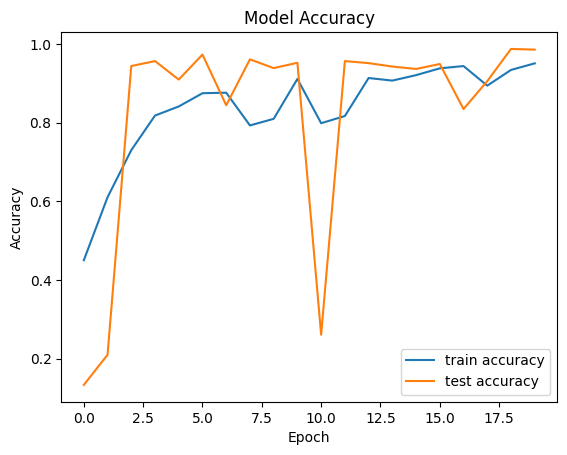

In [51]:
plt.plot(history.history['accuracy'],  label="train accuracy")
plt.plot(history.history['val_accuracy'], label="test accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

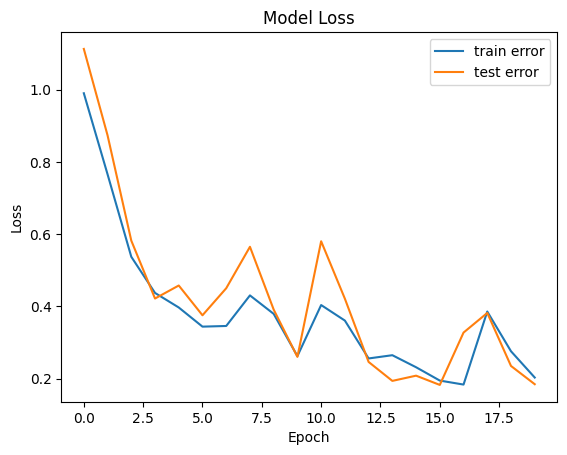

In [52]:
plt.plot(history.history['loss'],  label="train error")
plt.plot(history.history['val_loss'], label="test error")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# EVALUATE

In [ ]:
# from tensorflow.keras.models import load_model

# model = load_model('model/rnn_model.keras')

In [56]:
from sklearn.metrics import accuracy_score, classification_report

train_pred = rnn.predict(X_train)
test_pred = rnn.predict(X_test)

y_train_pred = train_pred.argmax(axis=1)
y_test_pred = test_pred.argmax(axis=1)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)

58/58 [==============================] - 1s 15ms/step
Train Accuracy:  0.9628183565593464
Test Accuracy:  0.587027027027027


In [54]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58       507
           1       0.57      0.46      0.51       499
           2       0.60      0.66      0.63       844

    accuracy                           0.59      1850
   macro avg       0.58      0.57      0.57      1850
weighted avg       0.59      0.59      0.58      1850

